# affine warping

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pathlib
import sys
import matplotlib
import matplotlib.cm as cm

from utils import *
import affinewarp

%reload_ext autoreload
%autoreload 2

plt.style.use("basic.mplstyle")
%matplotlib inline

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
print("platform: ", sys.platform)
if sys.platform == "linux":
    data_path = pathlib.Path('/mnt/c/Users/spencer/data/APT')
else:
    data_path = pathlib.Path('/Users/spencerw/Google Drive/APT_data')
    
# get files 
matfiles = list(data_path.glob('*.mat'))
print("num files: ", len(matfiles))

subject_numbers = ["S301","S302","S303","S304","S305","S306","S307","S308","S309","S310","S311","S322","S323","S327","S328"]
control_subject_numbers = ['S312','S313','S314','S315','S316','S317','S318','S319','S320','S325','S326']

# make a list of Session objects for each subject
subject_sessions = []
for subject in subject_numbers[1:2]:
    sessions = build_subject_sessions(subject, matfiles)
    print("subject ", subject,": ", len(sessions), " sessions")
    subject_sessions.append(sessions)
    
SUBJECT = 0
SESSION = 1
TARGET = 2
RADIUS = 256
WIDTH = 100
    
# we have sessions each with a polar trajectory list
sessions = subject_sessions[SUBJECT][1:-1]
session_lists = [session.combine_trials(TARGET) for session in sessions]
print("Number of sessions: \n",len(session_lists))
print("Trials in sessions: \n",[len(sl) for sl in session_lists])
block_lists = [b.trials for b in combine_blocks_from_sessions(sessions,TARGET)]
print("Number of blocks: \n",len(block_lists))
print("Trials in blocks: \n",[len(bl) for bl in block_lists])

all_trials = combine_trials_from_sessions(sessions,TARGET)

curve_stack = stack_curves(sessions,TARGET,type="interpolated")
derivative_stack = stack_derivatives(sessions,TARGET)
reward_stack = stack_reward(sessions,TARGET)
print("trajectory and derivative stacks: ", len(all_trials),curve_stack.shape,derivative_stack.shape,reward_stack.shape)


platform:  darwin
num files:  974
subject  S302 :  11  sessions
Number of sessions: 
 9
Trials in sessions: 
 [45, 45, 45, 44, 45, 44, 45, 45, 45]
Number of blocks: 
 27
Trials in blocks: 
 [15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 15, 15, 15, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
trajectory and derivative stacks:  403 (403, 2, 200) (403, 2, 200) (403, 1)


In [25]:
model = affinewarp.PiecewiseWarping(n_knots=2, warp_reg_scale=1e-6, smoothness_reg_scale=20.0)
model.fit(curve_stack[:,0,:])

Loss improvement: 95.80%: 100%|██████████| 50/50 [00:36<00:00,  1.36it/s]


In [26]:
transformed = model.transform(curve_stack[:,0,:])
rtransformed = model.transform(curve_stack[:,1,:])

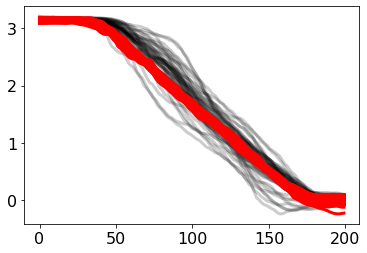

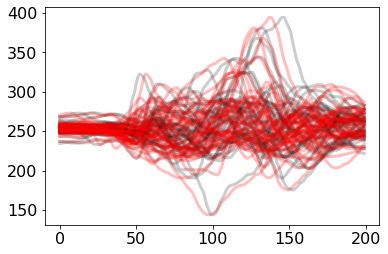

In [27]:
to = 5
fro = 50
plt.figure()
for c in curve_stack[to:fro,0,:]:
    plt.plot(c,'k',alpha=0.2)

for t in transformed[to:fro,:,0]:
    plt.plot(t,'r')
    
plt.figure()
for c in curve_stack[to:fro,1,:]:
    plt.plot(c,'k',alpha=0.2)

for t in rtransformed[to:fro,:,0]:
    plt.plot(t,'r',alpha=0.25)